# Task
## Predict whether a customer will buy a car insurance policy based on their demographic and historical data.
## Optimize for business impact and explain key decision factors.

In [ ]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anmolkumar/health-insurance-cross-sell-prediction")

print("Path to dataset files:", path)

In [ ]:
# List files in the dataset
print("Files in the dataset:")
for file in os.listdir(path):
    print(file)

# Load and explore Data

In [ ]:
# Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(os.path.join(path,"train.csv"))

In [162]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Check the target distribution

In [163]:
data_imbalance = df["Response"].value_counts()

In [164]:
data_imbalance.head()

Response
0    334399
1     46710
Name: count, dtype: int64

In [ ]:
(data_imbalance[1]/(data_imbalance[1] + data_imbalance[0]) ) * 100

In [ ]:
(data_imbalance[1]/(data_imbalance[0]) ) * 100

12 % mildly imbalanced

In [ ]:
df["Response"].value_counts().plot(kind="bar")

In [166]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset , WeightedRandomSampler
import pandas as pd
import numpy as np

# Load the data already done



In [ ]:
df["Driving_License"].value_counts()

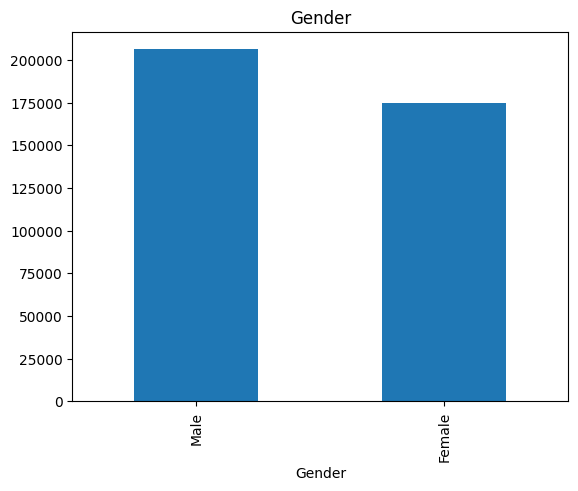

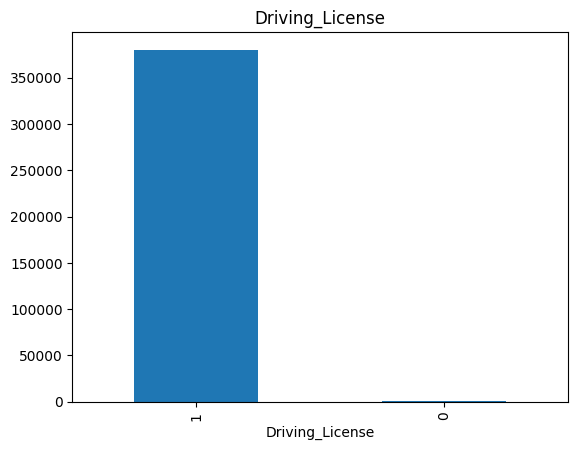

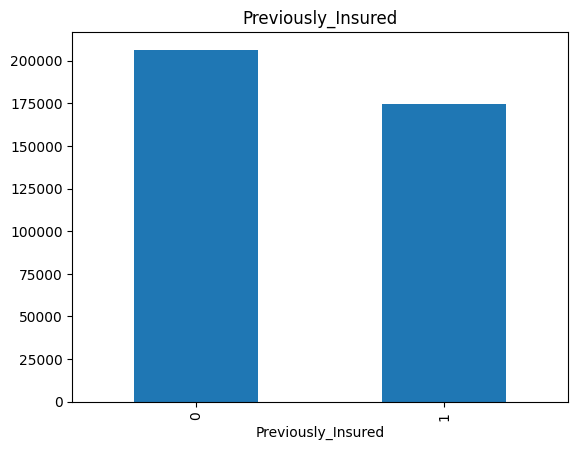

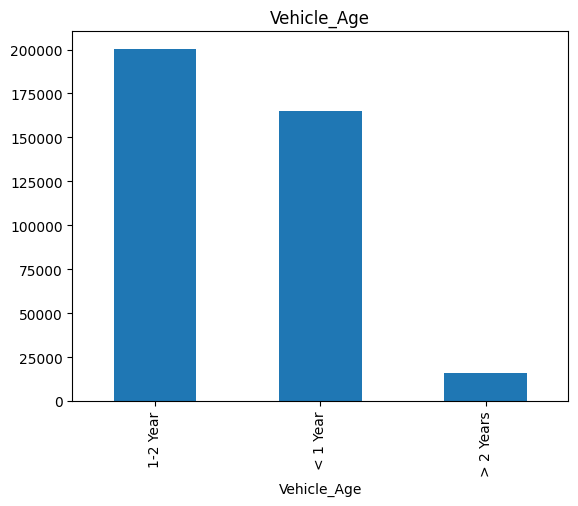

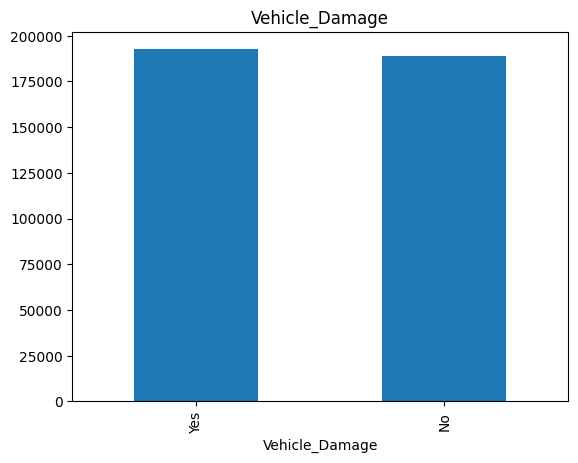

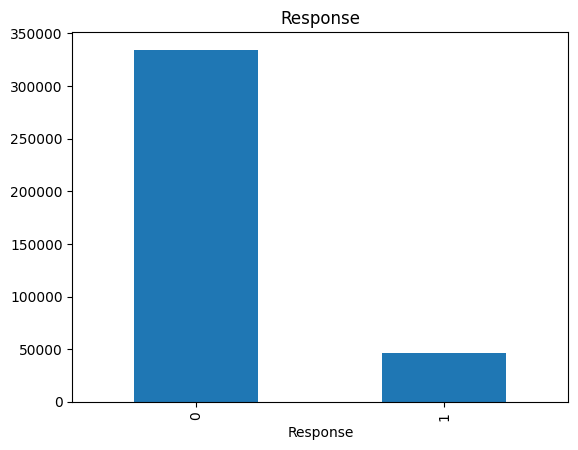

In [167]:
for column in df.columns:
    if df[column].nunique() <= 20:  # Plot only for columns with 20 or fewer unique values
        df[column].value_counts().plot(kind="bar", title=column)
        plt.show()

<Axes: xlabel='Age'>

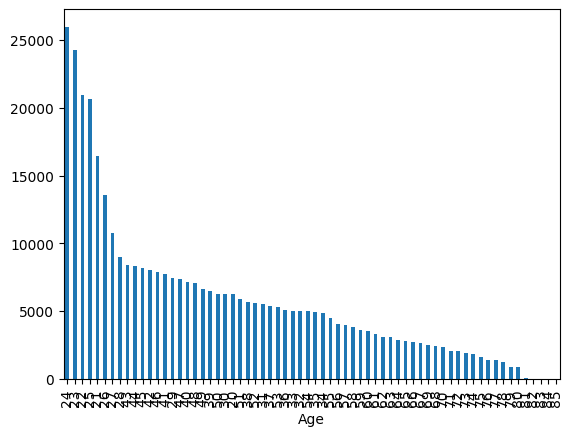

In [168]:
df["Age"].value_counts().plot(kind="bar")

# 

# Separate features and target

In [ ]:
# Seperate features & target
X = df.drop("Response", axis=1)
y = df["Response"]
# Define preprocessing
# Splitting the numeric features and categorical features
numeric_features = ["Age", "Annual_Premium", "Vintage"]


# Working with numerical Data
## Normalization and Binning
- Visualize ur data in plots or graphs
- Get statistics about your datas

In [169]:
df["Age"].head()
df["Annual_Premium"].head()
df["Vintage"].head()

0    217
1    183
2     27
3    203
4     39
Name: Vintage, dtype: int64

## Visualize ur data in plots or graphs

In [ ]:
df_numerical = df[numeric_features]
df_numerical.head()

## Histogram of Age (Feature)distribution

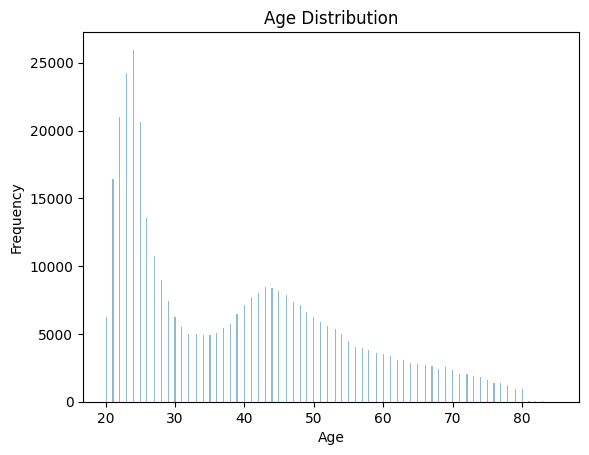

In [172]:
df_numerical["Age"].plot.hist(bins=400, alpha=0.5, title="Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Scatter Plot of Age (Feature) Distribution

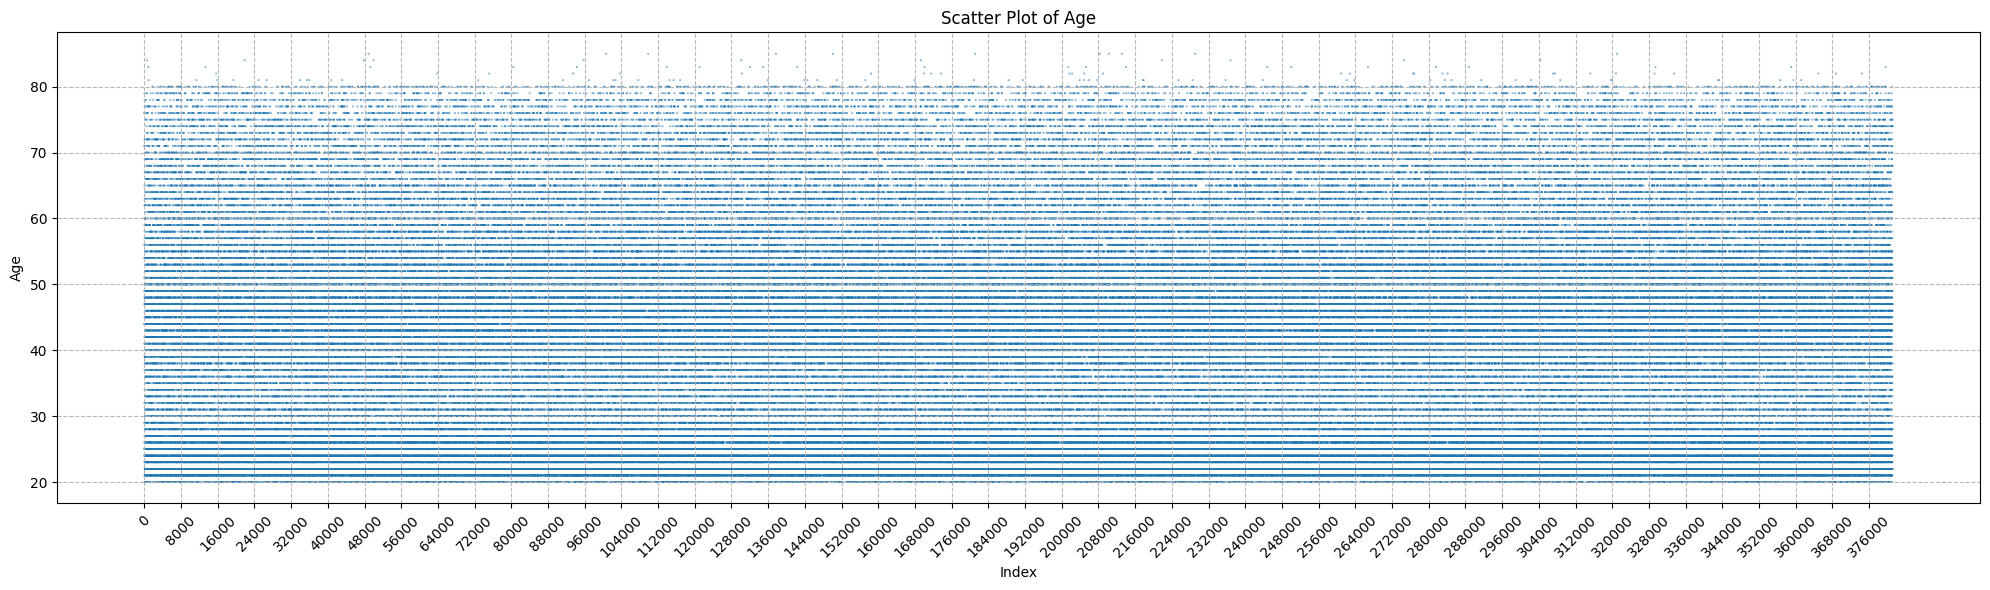

In [173]:
plt.figure(figsize=(20, 6))  # Increase the figure width for better spacing
plt.scatter(df.index, df["Age"], alpha=1, s=df["Age"]/1000)  # Adjust alpha and marker size for better visibility
plt.title("Scatter Plot of Age")
plt.xlabel("Index")
plt.ylabel("Age")

# Dynamically calculate step size based on the maximum age
step = max(1, df["Age"].max() // 10)  # Ensure step is at least 1
plt.xticks(ticks=np.arange(0, len(df), step=step * 1000), rotation=45)  # Adjust ticks dynamically

plt.grid(True, linestyle="--", alpha=0.9)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Kernel Density Estimation of Age

<Axes: ylabel='Density'>

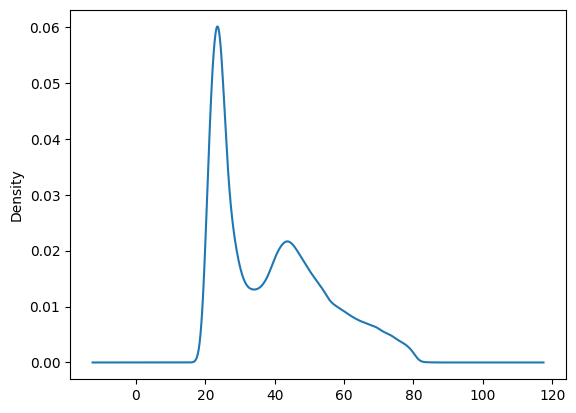

In [158]:
df["Age"].plot.kde()

## SECOND HISTOGRAM 

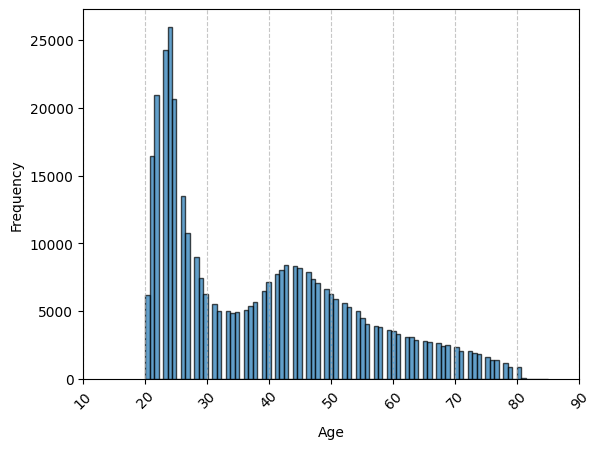

In [86]:
ax = df["Age"].plot(kind="hist", bins=90, alpha=0.7, edgecolor="black")  # Add edgecolor for better visibility
ax.set_xlabel("Age", labelpad=10)  # Add some padding to the x-axis label
plt.xticks(ticks=ax.get_xticks(), rotation=45)  # Rotate x-axis ticks for better readability
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add grid lines for the x-axis
plt.show()

## Scatter Plot of Vintage Feature

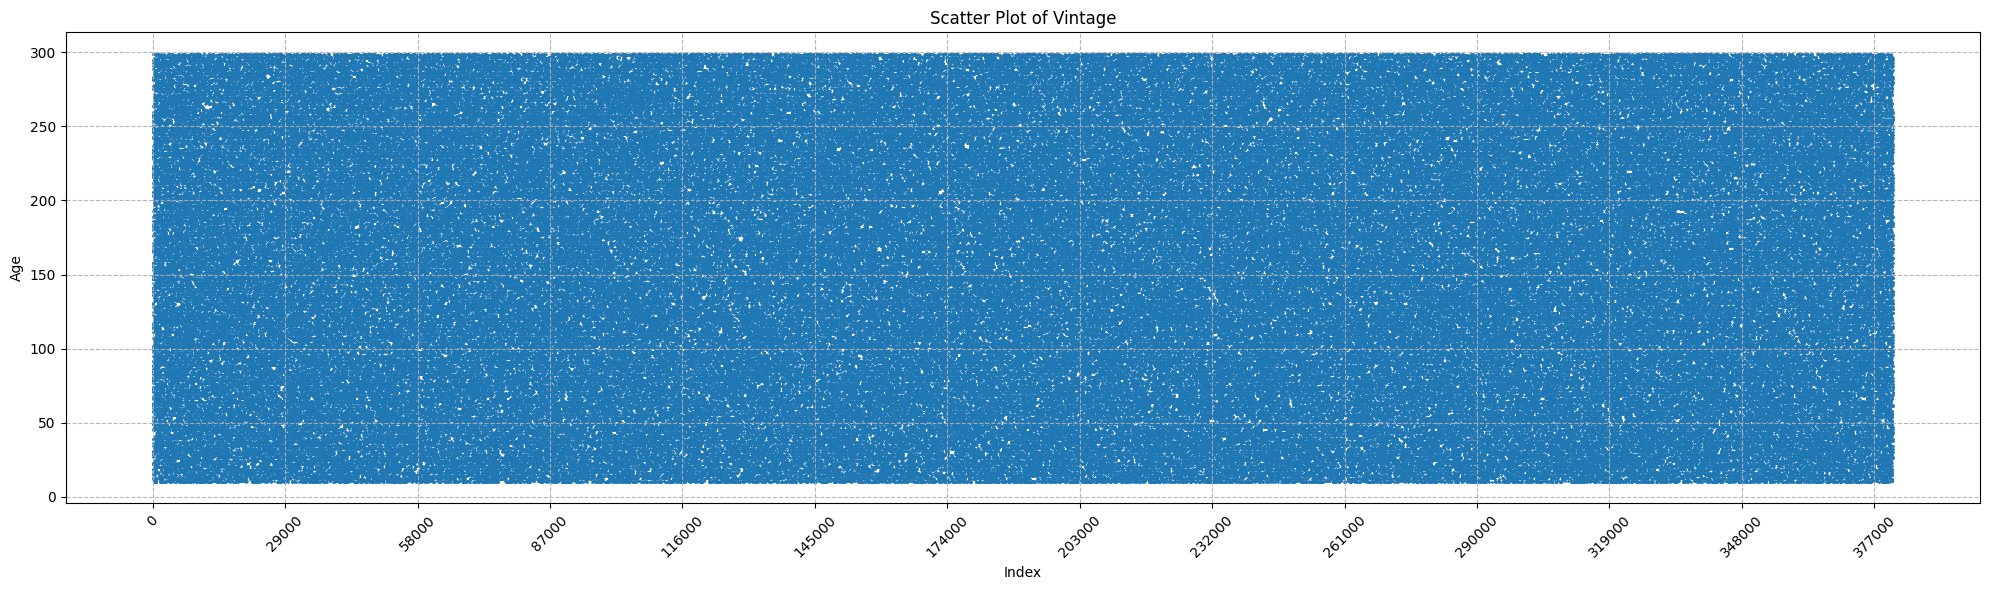

In [153]:
plt.figure(figsize=(20, 6))  # Increase the figure width for better spacing
plt.scatter(df.index, df["Vintage"], alpha=1, s=1)  # Adjust alpha and marker size for better visibility
plt.title("Scatter Plot of Vintage")
plt.xlabel("Index")
plt.ylabel("Age")

# Dynamically calculate step size based on the maximum age
step = max(1, df["Vintage"].max() // 10)  # Ensure step is at least 1
plt.xticks(ticks=np.arange(0, len(df), step=step * 1000), rotation=45)  # Adjust ticks dynamically

plt.grid(True, linestyle="--", alpha=0.9)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

## Kernel Density Estimation for Vintage 

<Axes: ylabel='Density'>

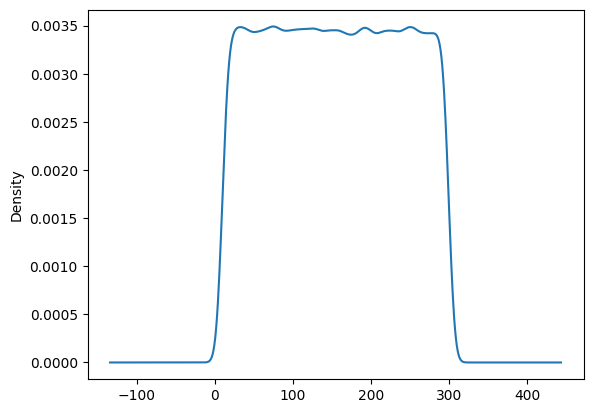

In [159]:
df["Vintage"].plot.kde()


## Scatter Plot for Annual Premium, Feature

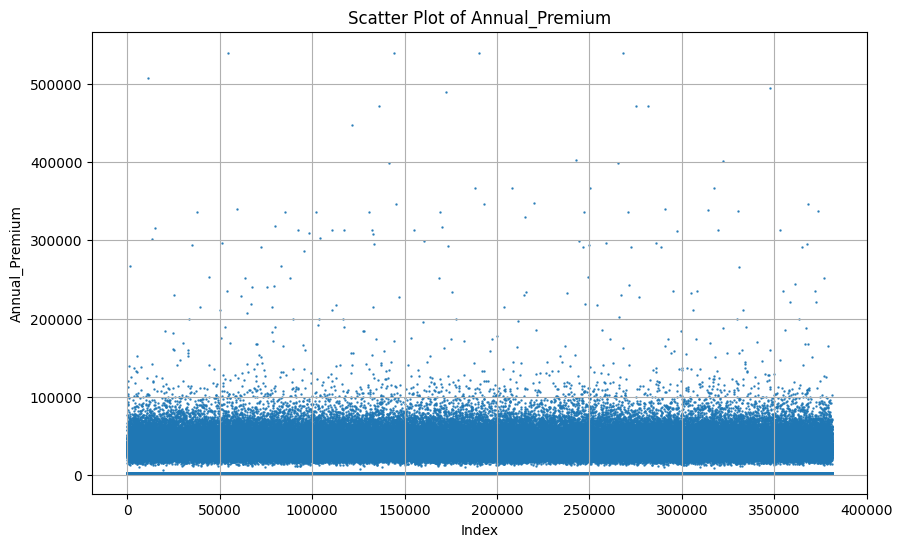

In [174]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["Annual_Premium"], alpha=0.9, s=0.5)  # Further reduce alpha and marker size
plt.title("Scatter Plot of Annual_Premium")
plt.xlabel("Index")
plt.ylabel("Annual_Premium")
plt.grid(True)
plt.show()

## Scatter Plot For Annual Premium 

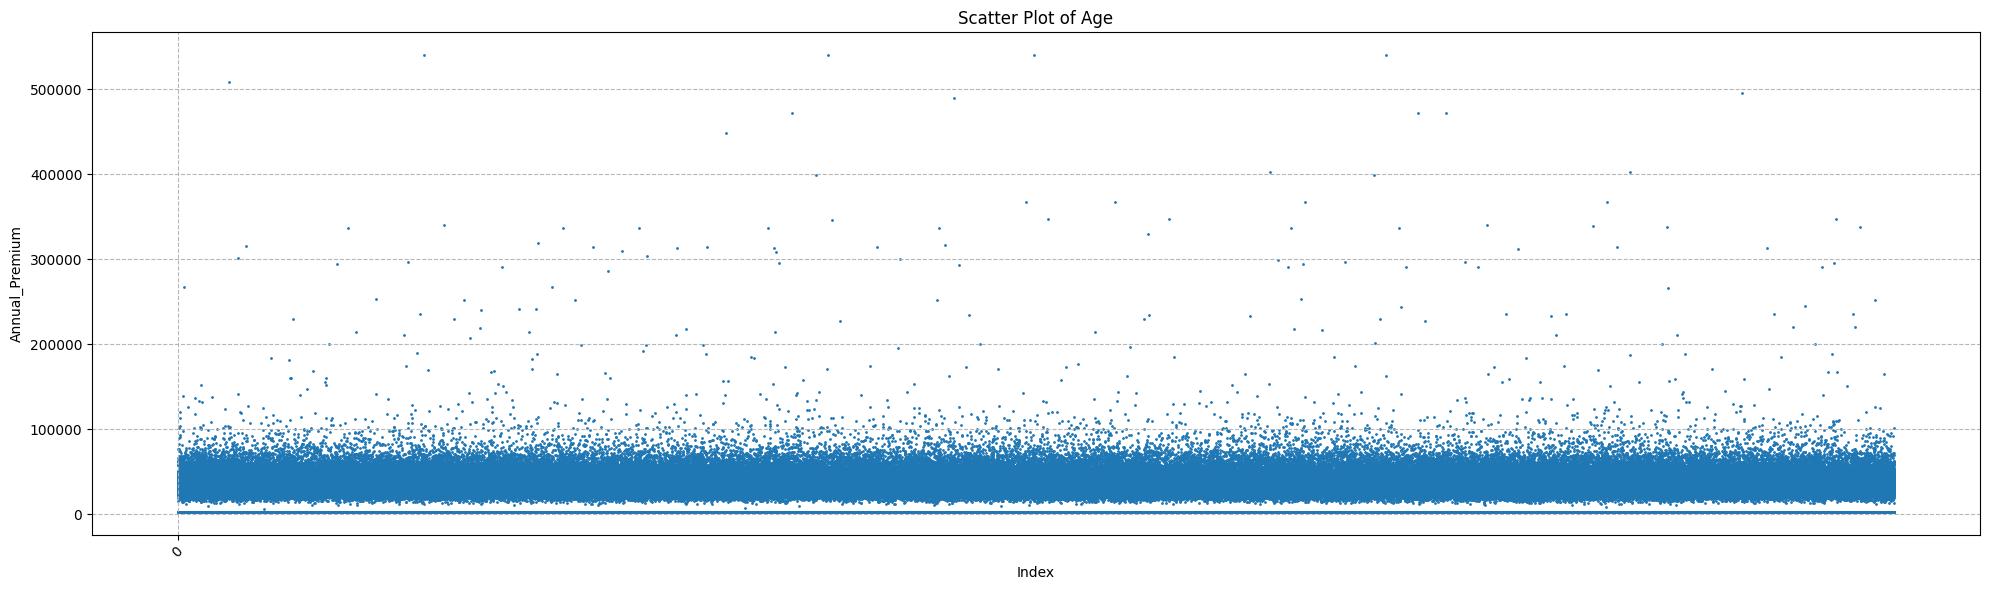

In [154]:
plt.figure(figsize=(20, 6))  # Increase the figure width for better spacing
plt.scatter(df.index, df["Annual_Premium"], alpha=1, s=1)  # Adjust alpha and marker size for better visibility
plt.title("Scatter Plot of Age")
plt.xlabel("Index")
plt.ylabel("Annual_Premium")

# Dynamically calculate step size based on the maximum age
step = max(1, df["Annual_Premium"].max() // 10)  # Ensure step is at least 1
plt.xticks(ticks=np.arange(0, len(df), step=step * 1000), rotation=45)  # Adjust ticks dynamically

plt.grid(True, linestyle="--", alpha=0.9)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

## Scatter Matrix for all the numerical data

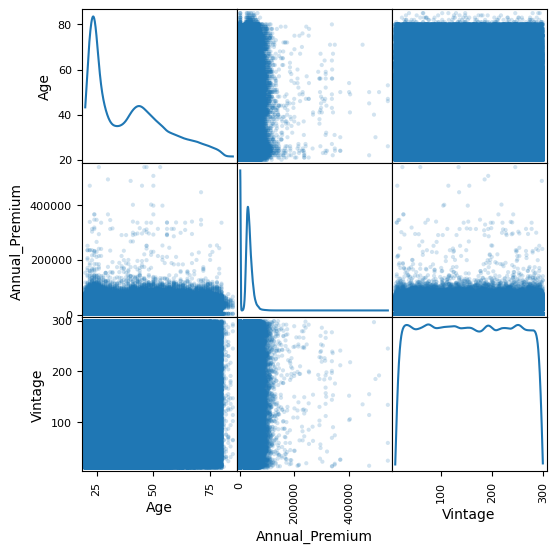

In [175]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_numerical, alpha=0.2, figsize=(6, 6), diagonal="kde");

## kERNEL Density Plot For Annual Premium Feature Variable

<Axes: ylabel='Density'>

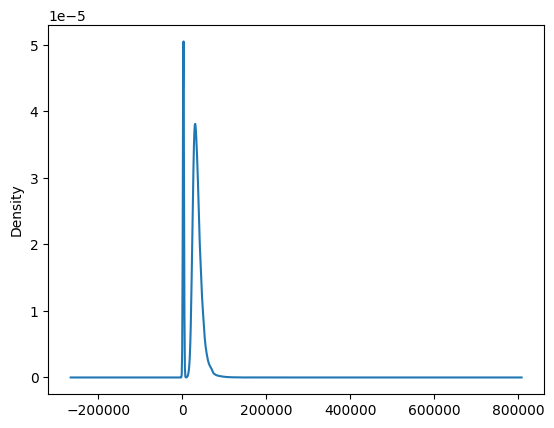

In [160]:
df["Annual_Premium"].plot.kde()


## Scaled Histogram for the Vintage Feature Variable

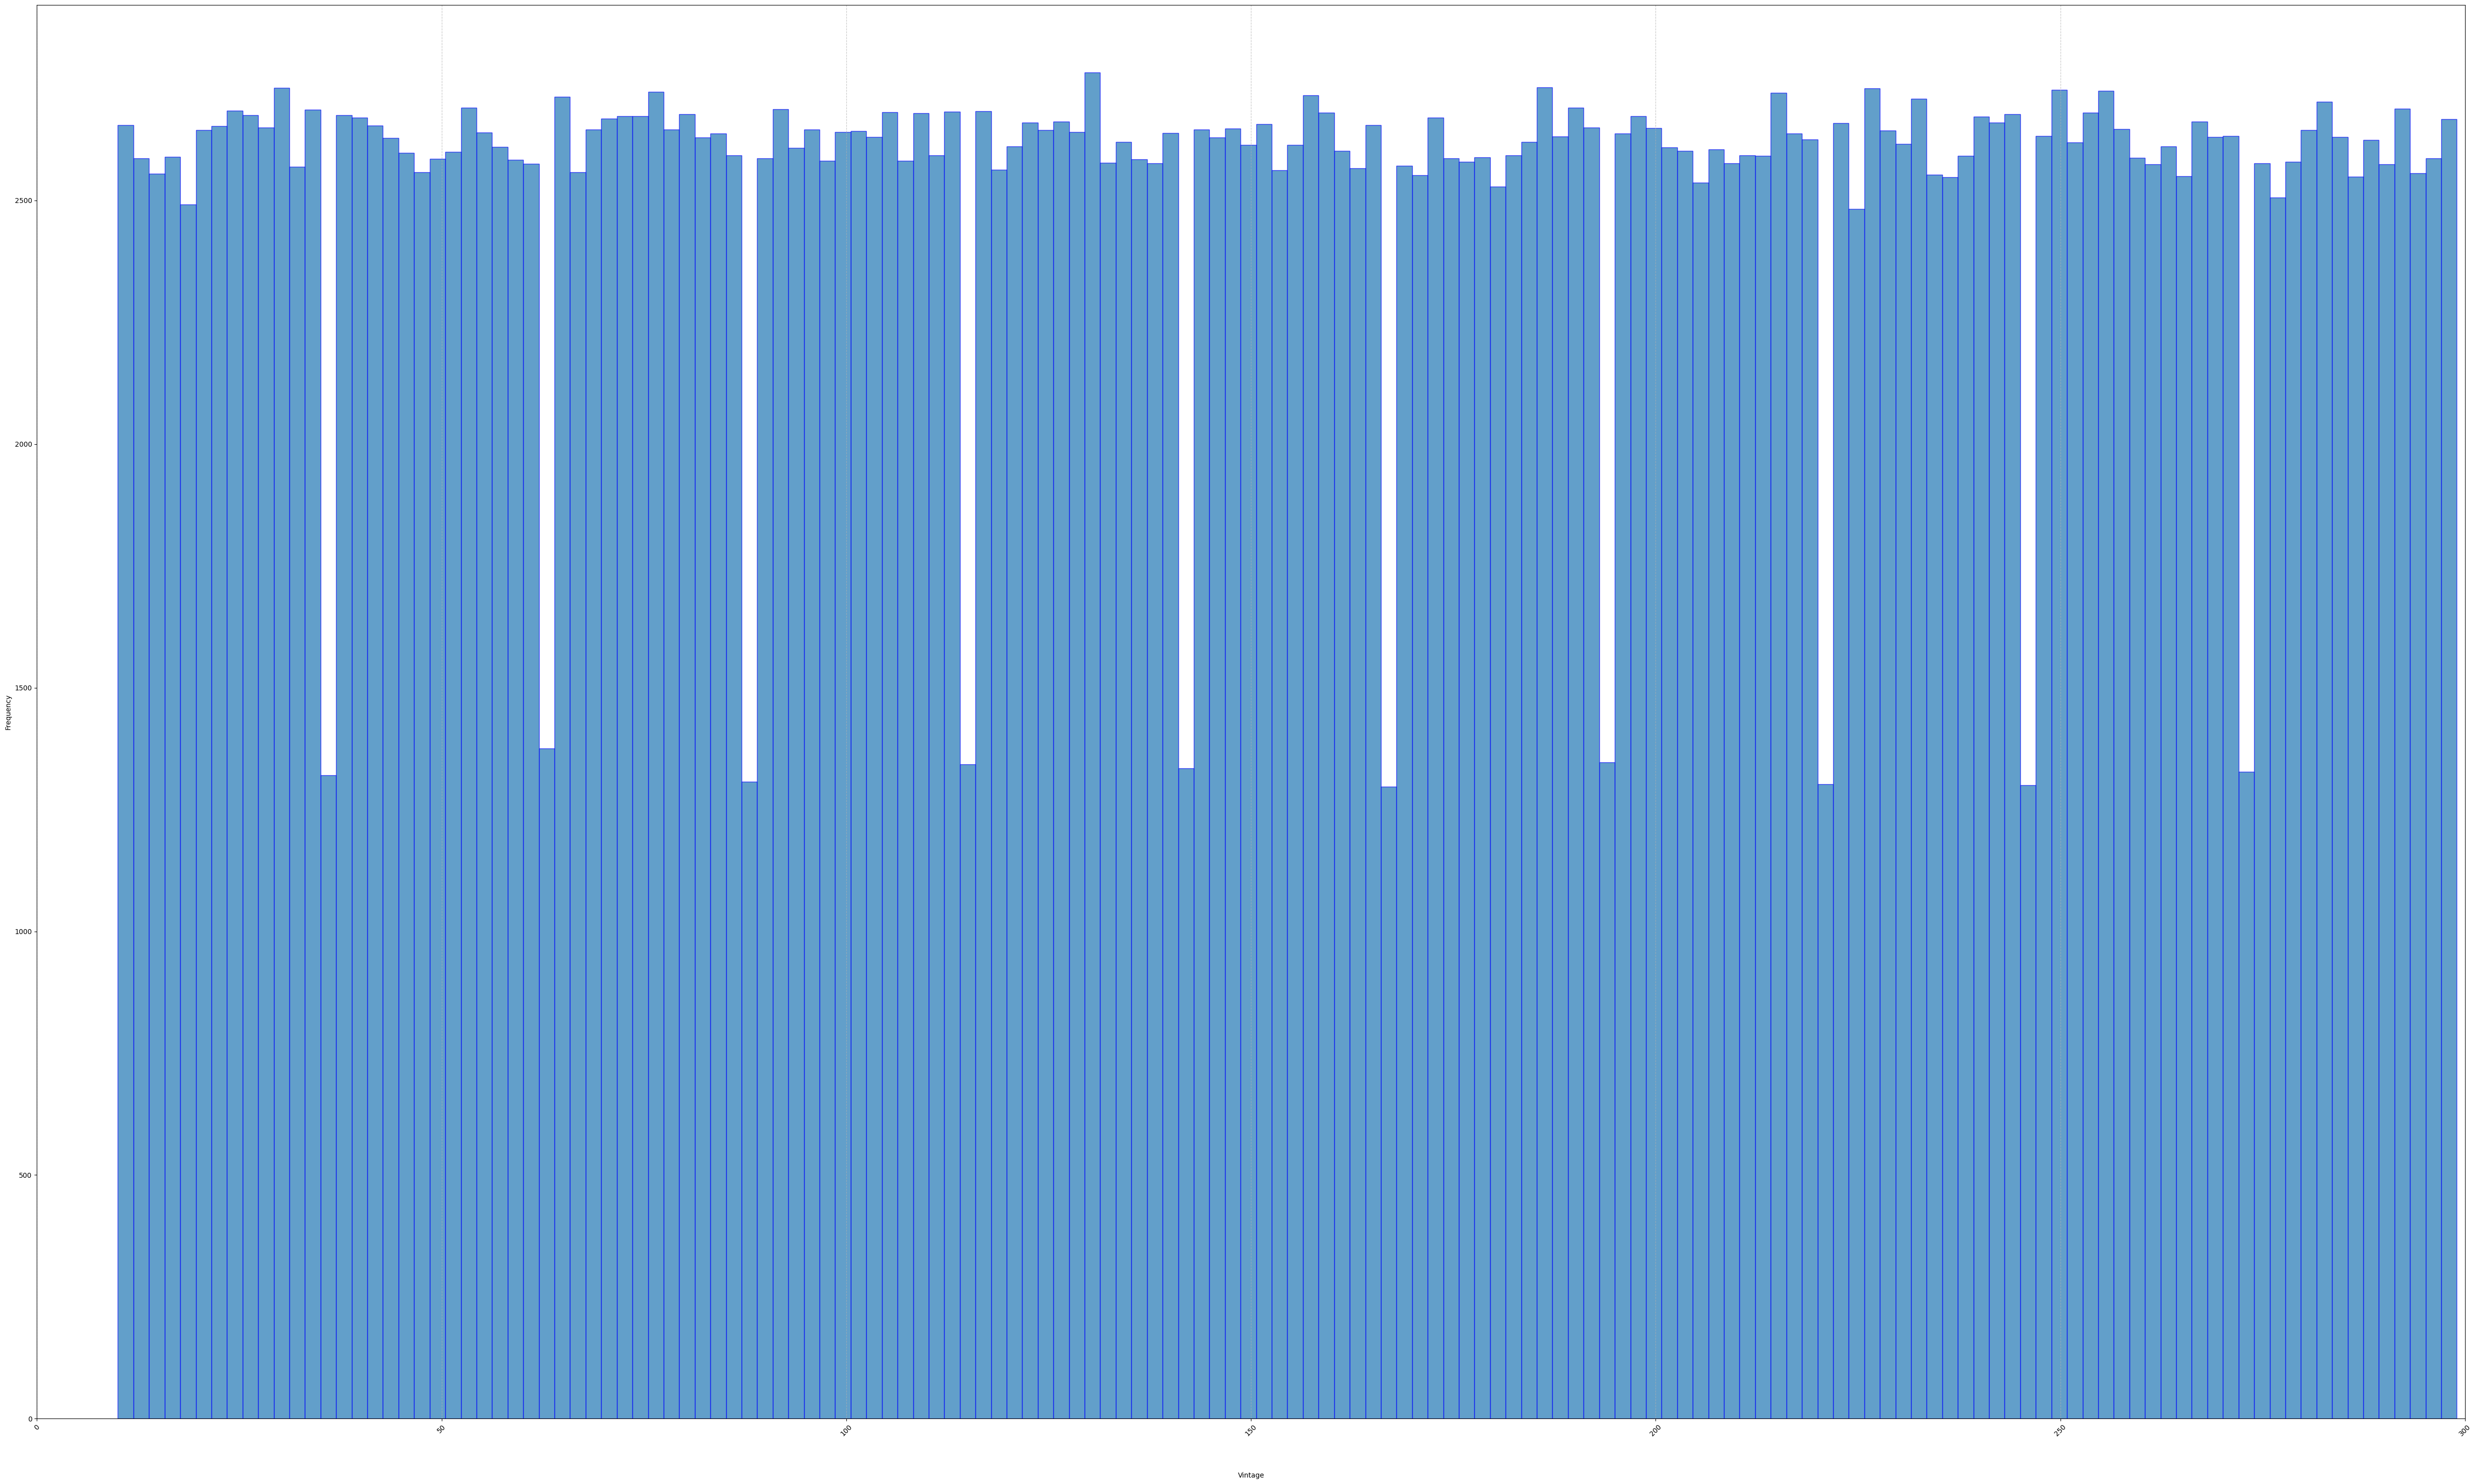

In [107]:
plt.figure(figsize=(50, 30))

ax = df["Vintage"].plot(kind="hist", bins=150, alpha=0.7, edgecolor="blue")  # Add edgecolor for better visibility
ax.set_xlim(df["Vintage"].min(), df["Vintage"].max())  # Set x-axis limits to zoom in on the data
ax.set_xlabel("Vintage", labelpad=50)  # Add some padding to the x-axis label
plt.xticks(ticks=ax.get_xticks(), rotation=45)  # Rotate x-axis ticks for better readability
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add grid lines for the x-axis
plt.tight_layout()  # Adjust layout to prevent x-axis labels from being cut off

plt.show()

## Scaling the Axis of the Histogram plot for Annual Premium Feature

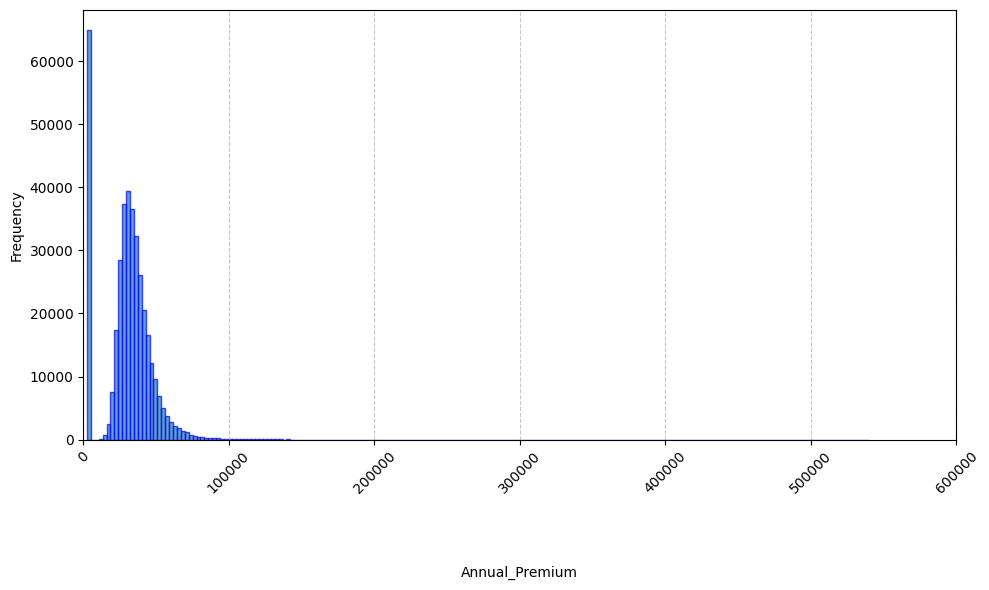

In [122]:
plt.figure(figsize=(10, 6))

ax = df["Annual_Premium"].plot(kind="hist", bins=200, alpha=0.7, edgecolor="blue")  # Add edgecolor for better visibility
ax.set_xlim(df["Annual_Premium"].min(), df["Annual_Premium"].max())  # Set x-axis limits to zoom in on the data
ax.set_xlabel("Annual_Premium", labelpad=50)  # Add some padding to the x-axis label
plt.xticks(ticks=ax.get_xticks(), rotation=45)  # Rotate x-axis ticks for better readability
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add grid lines for the x-axis
plt.tight_layout()  # Adjust layout to prevent x-axis labels from being cut off

plt.show()

Test this out

In [ ]:
df_numerical.corr(method="pearson").style.background_gradient(cmap="coolwarm", axis=None, low=0, high=1, gmap=True)


# Statistically evaluate your data

## With Mean Median Mode and Quartals

In [229]:
numerical_features_array = df_numerical.to_numpy()
#numerical_features_array = numerical_features_array.reshape(1, -1)
numerical_features_array.shape

(381109, 3)

## Extract the individual columns

In [ ]:
age = numerical_features_array[:, 0] # First column is Age
annual_premium = numerical_features_array[:, 1] # Second column is Annual_Premium
vintage = numerical_features_array[:, 2] # Third column is Vintage

array([44., 76., 47., ..., 21., 68., 46.], shape=(381109,))

# Compute Statistics

## Finding the mean

In [234]:
np.mean(age)

np.float64(38.822583565331705)

## The standard Deviation

In [235]:
np.std(age)

np.float64(15.511590667459156)

## The minimum and max values

In [236]:
np.min(age)

np.float64(20.0)

In [237]:
np.max(age)

np.float64(85.0)

## The median is less likely to be affected by extreme values

In [238]:
np.median(age)

np.float64(36.0)

# The Percentile 25

In [242]:
q1 =np.percentile(age, 25)

In [243]:
q2 = np.percentile(age, 50) # 50th percentile is the median

In [244]:
q3 = np.percentile(age, 75)